# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1

In questo esercizio viene chiesto di testare il generatore di numeri pseudo-casuali che ci è stato fornito, stimando il valore medio di una variabile casuale $r$ distribuita uniformemente in $[0,1)$ $\langle r \rangle = \int_0^1 r dr = 1/2$ e la sua incertezza $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. \
Per stimare accuratamente le incertezze statistiche è stato utilizzato il metodo della media a blocchi, che permette di ridurre la correlazione residua tra i campionamenti. Questa tecnica prevede di suddividere i dati in blocchi e calcolare la media di ciascun blocco. Le medie dei blocchi sono poi utilizzate per stimare le incertezze. Dati $M$ campionamenti e $N=M/L$ blocchi, con $L$ numero di campionamenti in ogni blocco, una stima della varianza $\sigma^2$ di $A$ può essere ottenuta da: 

$$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$

con 

$$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$

che implica:

$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.stats import chi2, norm, cauchy

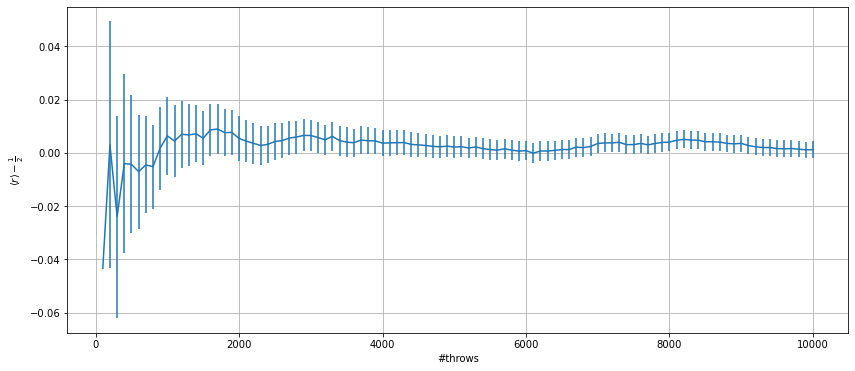

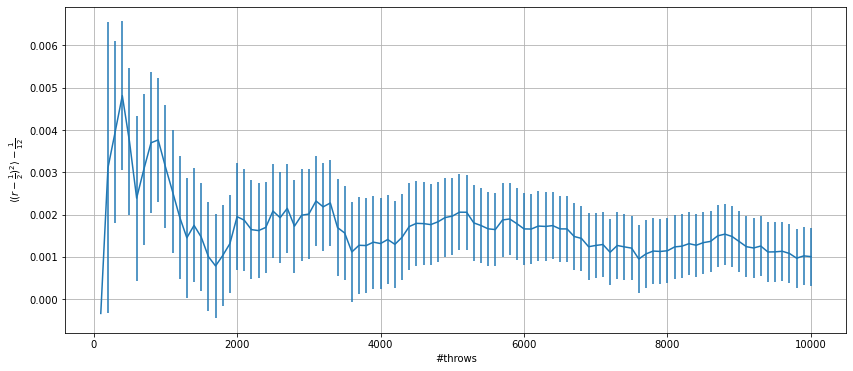

In [2]:
M=10000               # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block
x = np.arange(N) + 1  # [0,1,2,...,N-1]
x*=L                  # Number of throws = block * (Number of throws in each block)

mean_result = np.loadtxt('mean_result.txt', delimiter=' ')
var_result = np.loadtxt('var_result.txt', delimiter=' ')

plt.figure(figsize=(14,6))
plt.errorbar(x, mean_result[:,0]-0.5, yerr=mean_result[:,1])
plt.xlabel('#throws')
plt.ylabel(r'$\langle r\rangle -\frac{1}{2}$')
plt.grid(True)
plt.show()

plt.figure(figsize=(14,6))
plt.errorbar(x, var_result[:,0]-1/12,yerr=var_result[:,1])
plt.xlabel('#throws')
plt.ylabel(r'$\langle (r-\frac{1}{2})^2 \rangle -\frac{1}{12}$')
plt.grid(True)
plt.show()

Dai grafici risulta evidente la riduzione dell'incertezza all'aumentare del numero di blocchi, consistente con l'aspettazione teorica. In entrambi i casi, il valore teorico atteso è compatibile con la stima Monte Carlo nel limite di circa una deviazione standard.

Verifichiamo ora l'ipotesi che i numeri $r$ siano estratti da una distribuzione uniforme, mediante il test del $\chi^2$. Per fare questo, è stato suddiviso l'intervallo $[0,1]$ in $M=100$ parti uguali e implementato il test $\chi^2$ 100 volte. In questo caso, il $\chi^2$ assume la forma:

$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

dove $n_i$ indica quanti campionamenti cadono nell'i-esimo intervallo e $n$ è il numero totale di campionamenti. Ci si dovrebbe aspettare in media che $(n_i - n/M)^2 \simeq n/M$ e quindi $\chi^2 \simeq 100$, cioè il numero di sottointervalli. Un valore maggiore di 𝜒² indica che l'ipotesi è piuttosto improbabile.

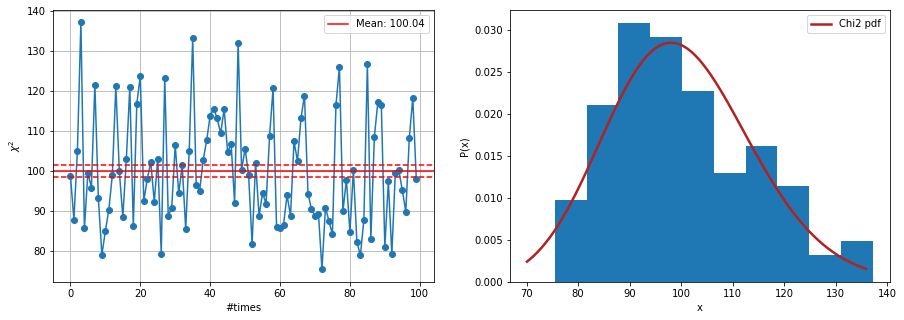

In [3]:
chi2_result = np.loadtxt('chi2_result.txt', delimiter=' ')

mean = np.mean(chi2_result)
sigma = np.std(chi2_result)

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

ax0.plot(np.arange(N), chi2_result, marker='o')
ax0.set_xlabel('#times')
ax0.set_ylabel('$\chi^2$')
ax0.axhline(y=mean, color='r', label='Mean: '+str(round(mean, 2)))
ax0.axhline(y=mean+sigma/10, color='r', linestyle='dashed')
ax0.axhline(y=mean-sigma/10, color='r', linestyle='dashed')
ax0.legend()
ax0.grid(True)

df = 100
x_chi2 = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)

ax1.hist(chi2_result, density=True)
ax1.plot(x_chi2, chi2.pdf(x_chi2, df), color='firebrick', lw=2.5, label='Chi2 pdf')
ax1.set_xlabel('x')
ax1.set_ylabel('P(x)')
ax1.legend()
plt.show()

Per calcolare $n_i$ è stato utilizzato l'algoritmo di ricerca binaria. Come aspettato, la media empirica risulta circa pari a 100 e l'istrogramma dei valori ottenuti di $\chi^2$ tende alla distribuzione di probabilità teorica del $\chi^2$. Pertanto, possiamo concludere che il nostro generatore di numeri pseudo-casuali è buono. 

### Exercise 01.2

In questo esercizio viene chiesto di estendere il generatore di numeri pseudo-casuali e verificare il Teorema del Limite Centrale. In particolare, è stato utilizzato il metodo dell'inversione della distribuzione cumulativa per campionare da una distribuzione esponenziale generica, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ e una distribuzione di Cauchy-Lorentz generica, $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$. Successivamente, sono stati riempiti degli istogrammi con $10^4$ realizzazioni di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (per $N=1, 2, 10, 100$), nel caso in cui $x_i$ fosse una variabile casuale distribuita in modo uniforme, esponenziale ($\lambda=1$) e lorentziano ($\mu=0$ e $\Gamma=1$).

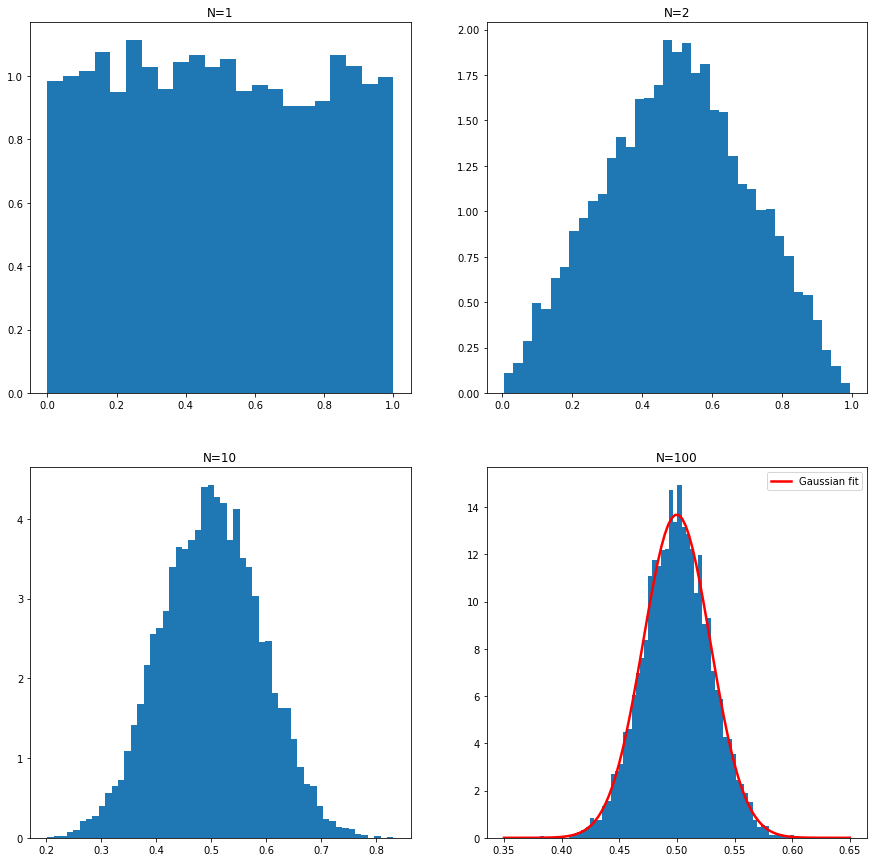

In [4]:
unif_result = np.loadtxt('unif_result.txt', usecols=(0,1,2,3), delimiter=' ')

mu, sigma = norm.fit(unif_result[:,3])
x = np.linspace(0.35, 0.65, 100)

fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2, 2, figsize=(15,15))
ax0.hist(unif_result[:,0], bins='auto', density=True)
ax0.set_title("N=1")
ax1.hist(unif_result[:,1], bins='auto', density=True)
ax1.set_title("N=2")
ax2.hist(unif_result[:,2], bins='auto', density=True)
ax2.set_title("N=10")
ax3.hist(unif_result[:,3], bins='auto', density=True)
ax3.set_title("N=100")
ax3.plot(x, norm.pdf(x,mu,sigma), color='r', lw=2.5, label='Gaussian fit')
ax3.legend()
plt.show()

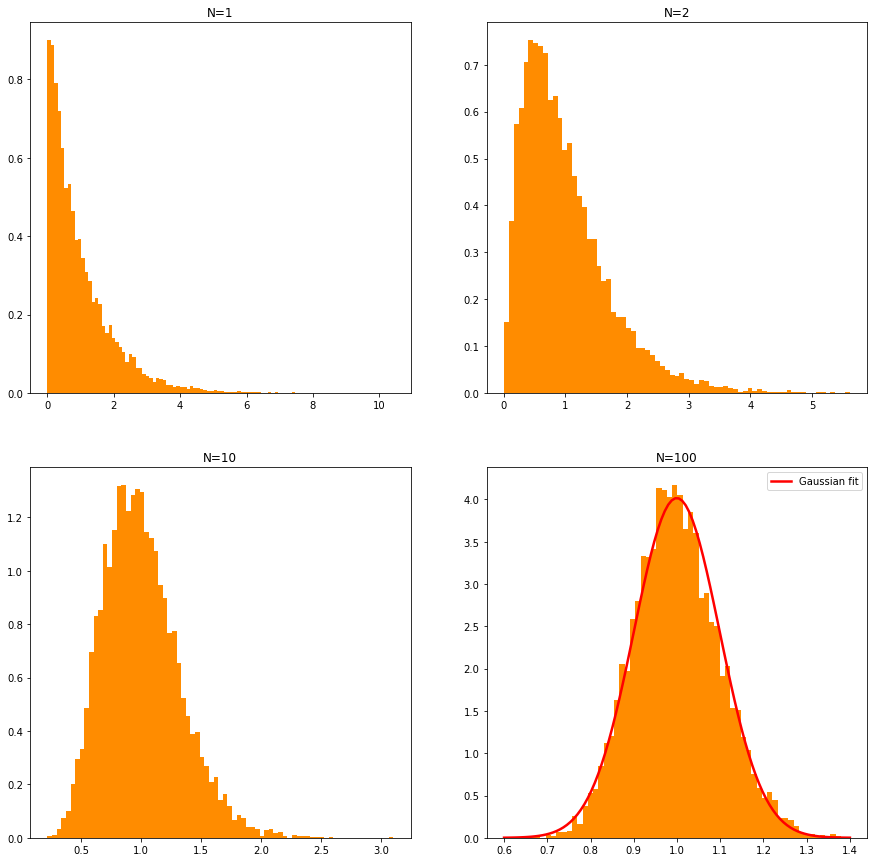

In [5]:
exp_result = np.loadtxt('exp_result.txt', usecols=(0,1,2,3), delimiter=' ')

mu, sigma = norm.fit(exp_result[:,3])
x = np.linspace(0.6, 1.4, 100)

fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2, 2, figsize=(15,15))
ax0.hist(exp_result[:,0], bins='auto', density=True, color='darkorange')
ax0.set_title("N=1")
ax1.hist(exp_result[:,1], bins='auto', density=True, color='darkorange')
ax1.set_title("N=2")
ax2.hist(exp_result[:,2], bins='auto', density=True, color='darkorange')
ax2.set_title("N=10")
ax3.hist(exp_result[:,3], bins='auto', density=True, color='darkorange')
ax3.set_title("N=100")
ax3.plot(x, norm.pdf(x,mu,sigma), color='r', lw=2.5, label='Gaussian fit')
ax3.legend()
plt.show()

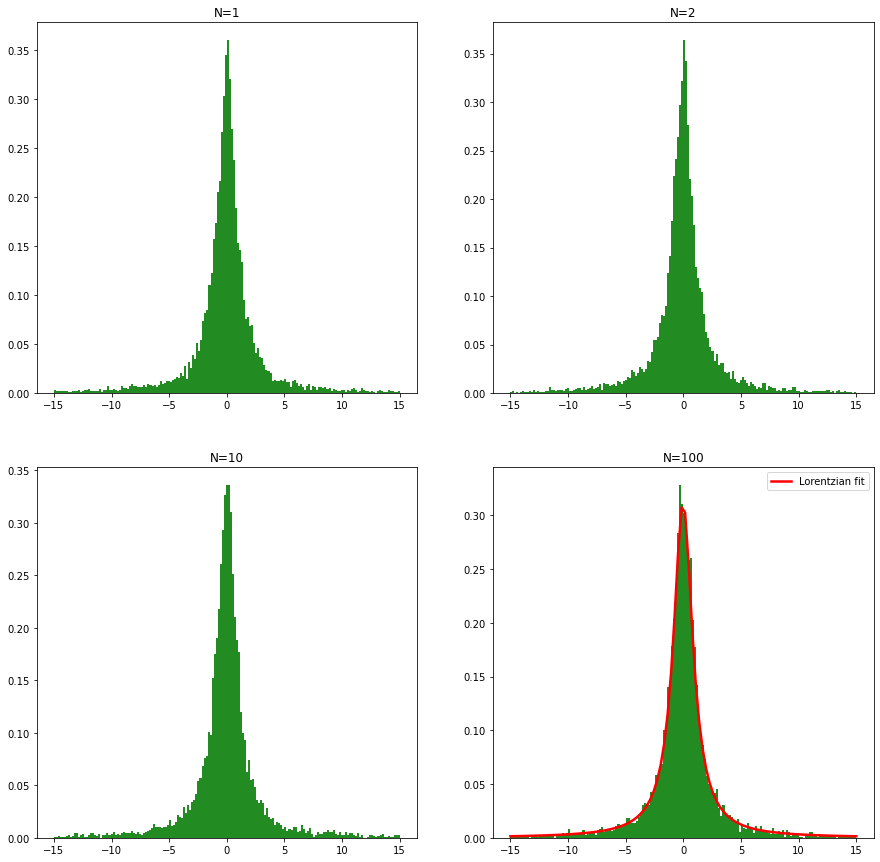

In [6]:
lor_result = np.loadtxt('lor_result.txt', usecols=(0,1,2,3), delimiter=' ')

mu, gamma = cauchy.fit(lor_result[:,3])
x = np.linspace(-15, 15, 100)

fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2, 2, figsize=(15,15))
ax0.hist(lor_result[:,0], bins='auto', range=(-15,15), density=True, color='forestgreen')
ax0.set_title("N=1")
ax1.hist(lor_result[:,1], bins='auto', range=(-15,15), density=True, color='forestgreen')
ax1.set_title("N=2")
ax2.hist(lor_result[:,2], bins='auto', range=(-15,15), density=True, color='forestgreen')
ax2.set_title("N=10")
ax3.hist(lor_result[:,3], bins='auto', range=(-15,15), density=True, color='forestgreen')
ax3.set_title("N=100")
ax3.plot(x, cauchy.pdf(x,mu,gamma), color='r', lw=2.5, label='Lorentzian fit')
ax3.legend()
plt.show()

Dai grafici si può apprezzare come la distribuzione limite della somma di variabili casuali distribuite in modo uniforme e esponenziale, sia una Gaussiana, in accordo con il teorema del limite centrale. Mentre quella della somma di variabili casuali distribuite come una lorentziana, è una Cauchy-Lorentz. Infatti, la distribuzione di Cauchy-Lorentz non ha varianza finita e quindi per quest'ultima non vale il teorema del limite centrale. 

### Exercise 01.3

In questo esercizio viene chiesto di simulare l'esperimento di Buffon per stimare $\pi$. L'esperimento consiste nel lancio ripetuto di un ago di lunghezza $L$ su un piano orizzontale segnato con linee rette a una distanza $d$ ($d>L$). La probabilità $P$ che l'ago intersechi una di queste linee è $P = 2L/\pi d$. Se l'ago viene lanciato $N_{thr}$ volte e si osserva che atterra su una linea $N_{hit}$ volte, possiamo stimare $\pi$ da: 

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

Nella simulazione è stato assunto $L=1$ e $d=1.5$. Per stimare il valore medio di $\pi$, è stato utilizzato il metodo della media a blocchi, considerando $M=10^6$ campionamenti e $N=100$ blocchi. 

E' stata strutturata la simulazione in modo che quando $x + L\cos(\theta)<0$ o $x + L\cos(\theta)>d$, dove $x$ è una variabile casuale uniforme in $[0;d]$ e $\theta$ una variabile casuale uniforme in $[0;2\pi]$ campionata con la tecnica di rigetto, significa che l'ago atterra su una linea. 

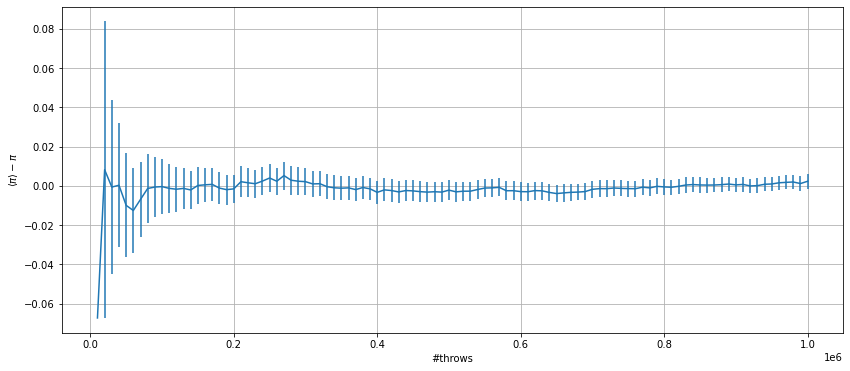

In [7]:
M=1000000             # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block
x = np.arange(N) + 1  # [0,1,2,...,N-1]
x*=L                  # Number of throws = block * (Number of throws in each block)

needle_result = np.loadtxt('needle_result.txt', delimiter=' ')

plt.figure(figsize=(14,6))
plt.errorbar(x, needle_result[:,0]-np.pi, yerr=needle_result[:,1])
plt.xlabel('#throws')
plt.ylabel((r'$\langle \pi \rangle -\pi$'))
plt.grid(True)
plt.show()

Dal grafico si può osservare un'ottima compatibilità tra il valore teorico atteso e la stima Monte Carlo.